In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import mean_squared_error as MSR
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier as DTC

In [ ]:
# Read Dataset
Diabetets = pd.read_csv('/Healthcare-Diabetes.csv')
Diabetets.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# Information about Dataset
Diabetets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [ ]:
# Show Column of Dataset
Diabetets.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Show that disease is Pregnancy or Not
def Pregnancy(x):
    if x > 0:
        return 1
    else:
        return 0

In [ ]:
Diabetets['Pregnancies'] = Diabetets['Pregnancies'].apply(Pregnancy)

In [ ]:
# Drop Usefuless
Diabetets.drop('Id',axis=1,inplace=True)
Diabetets.rename({'Pregnancies':'Pregnancy'},axis=1,inplace=True)

In [ ]:
# Show Null Values
Diabetets.isnull().sum()

Pregnancy                   0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
Diabetets.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancy,2768.0,0.851156,0.355999,0.000,1.000,1.000,1.000,1.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


Text(0.5, 1.0, 'Relationship betewwn Glucose , BloodPressure and Diabetets')

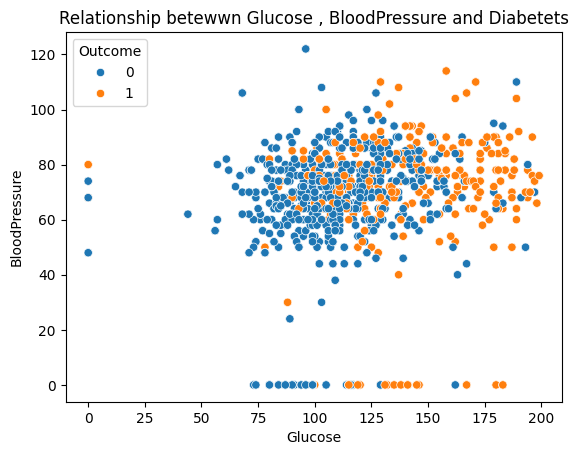

In [ ]:
sns.scatterplot(Diabetets,x='Glucose',y='BloodPressure',hue='Outcome')
plt.title('Relationship betewwn Glucose , BloodPressure and Diabetets')

Text(0.5, 1.0, 'Relationship betewwn Insulin , BMI and Diabetets')

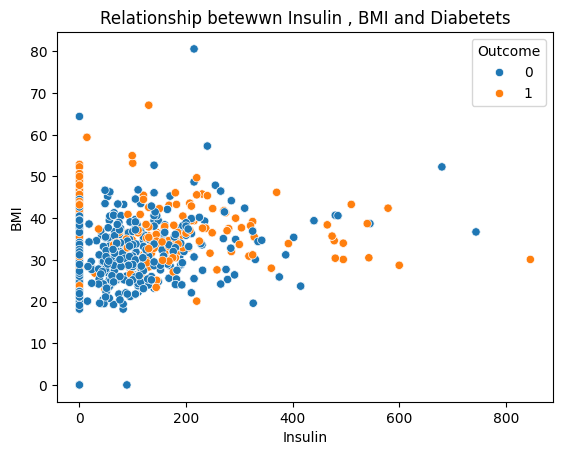

In [ ]:
sns.scatterplot(Diabetets,x='Insulin',y='BMI',hue='Outcome')
plt.title('Relationship betewwn Insulin , BMI and Diabetets')

Text(0.5, 1.0, 'Relationship betewwn DiabetesPedigreeFunction , Age and Diabetets')

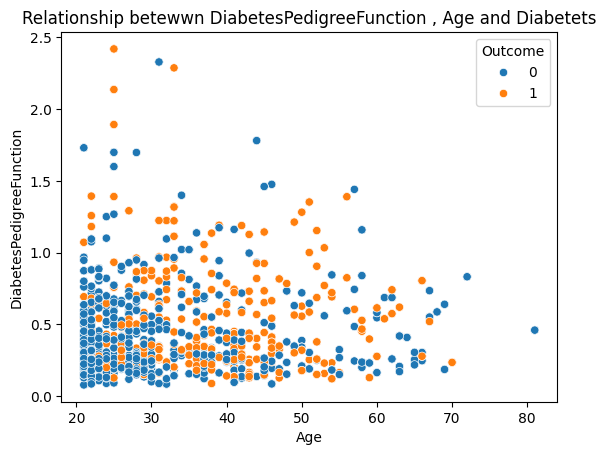

In [ ]:
sns.scatterplot(Diabetets,x='Age',y='DiabetesPedigreeFunction',hue='Outcome')
plt.title('Relationship betewwn DiabetesPedigreeFunction , Age and Diabetets')

In [ ]:
X = Diabetets.iloc[:,:-1]
Y = Diabetets.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test = split(X,Y,test_size=0.2,random_state=44)

In [ ]:
print('---Train Data Shape----',x_train.shape,y_train.shape,sep='\n')

---Train Data Shape----
(2214, 8)
(2214,)


In [ ]:
print('---Test Data Shape----',x_test.shape,y_test.shape,sep='\n')

---Test Data Shape----
(554, 8)
(554,)


In [ ]:
classifier = DTC()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
print('Accuracy of Train Data',classifier.score(x_train,y_train)*100,sep=' : ')

Accuracy of Train Data : 100.0


In [ ]:
print('Accuracy of test Data',classifier.score(x_test,y_test)*100,sep=' : ')

Accuracy of test Data : 99.27797833935018


In [ ]:
y_prediction = classifier.predict(x_test)

In [ ]:
accuracy =  accuracy_score(y_test,y_prediction)
print('Accuracy = ' ,accuracy*100)

Accuracy =  99.27797833935018


In [ ]:
error =  MSR(y_test,y_prediction)
print('Mean Squared Error = ' ,error)

Mean Squared Error =  0.007220216606498195


Confusion Matrix =  [[362   3]
 [  1 188]]


<Axes: title={'center': 'Confusion Matrix heatmap'}>

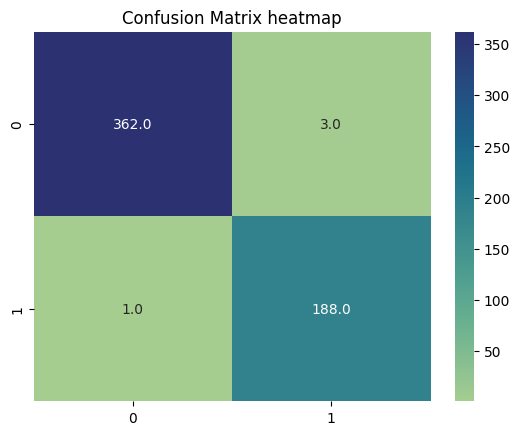

In [ ]:
matrix = confusion_matrix(y_test,y_prediction)
print('Confusion Matrix = ',matrix)
plt.title('Confusion Matrix heatmap')
sns.heatmap(matrix,annot=True, fmt=".1f",cmap='crest')